# Analise_de_Dados

Dados(Não Reais) de 2019 de uma empresa de prestação de serviços(Não Real). 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados


In [101]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv',sep=';', decimal=',') 

clientes_df = pd.read_csv(r'CadastroClientes.csv',sep=';', decimal=',')

servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)



In [102]:

funcionarios_df.sample(5)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
103,133,Adrielle Sá Rodrigues,11424,5712.0,2284.8,286,540.96,Logística
64,80,Frederico Vidal,7833,3916.5,1566.6,220,517.44,Comercial
83,105,Roberta Vaz,21315,10657.5,4263.0,286,698.88,Comercial
59,74,Átila Godoy de Melo,8831,4415.5,1766.2,264,668.64,Financeiro
93,121,Paulo Rodrigues Pereira,9870,4935.0,1974.0,220,661.92,Logística


In [103]:

clientes_df.sample(5)


,ID Cliente,Cliente,Valor Contrato Mensal
268,269,Minhoto Araújo,1170
222,223,Gonçalves Santos,1710
299,300,Lorena Costa,2655
139,140,Félix Cotta,3150
16,17,Alberto Martins,3780


In [104]:

servicos_df.sample(5)


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Unnamed: 4,Unnamed: 5
192,OS0193,47,259,6,NaN,NaN
216,OS0217,103,294,10,NaN,NaN
222,OS0223,121,303,4,NaN,NaN
42,OS0043,142,52,12,NaN,NaN
7,OS0008,11,9,6,NaN,NaN


### 1 - Folha Salarial 


In [105]:

funcionarios_df['Total_Folha'] = funcionarios_df.loc[:,'Salario Base':'VR'].sum(axis=1)
total_folha_pagamento = funcionarios_df['Total_Folha'].sum(axis=0)
print('\033[1;34mO Total da Folha de Pagamento é: \033[1;32mR$ {:,.2f}\033[m '.format(total_folha_pagamento))


O Total da Folha de Pagamento é: R$ 2,717,493.22 


### 2 - Faturamento da Empresa

In [106]:

f_t = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']])
f_t['Faturamento Total'] = f_t['Tempo Total de Contrato (Meses)'] * f_t['Valor Contrato Mensal']
print('\033[1;34mO Faturamento da Empresa foi: \033[1;32mR$ {:,.2f}\033[m'.format(sum(f_t['Faturamento Total'])))


O Faturamento da Empresa foi: R$ 5,519,160.00


### 3 - Percentual de Funcionarios Que Fecharam Contrato

In [107]:

a = len(servicos_df['ID Funcionário'].unique())
a_t = len(funcionarios_df['ID Funcionário'])
print('\033[1;34mPercentual de Funcionarios que fecharam contrato: \033[1;32m{:.2%}\033[m'.format(a/a_t))


Percentual de Funcionarios que fecharam contrato: 86.84%


### 4 - Qtde Contratos por Área

In [109]:

contratos_area_df = servicos_df.merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')

contratos_area_qtde = contratos_area_df['Area']

contratos_area_qtde.value_counts()


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

### 5 - Funcioários por Área

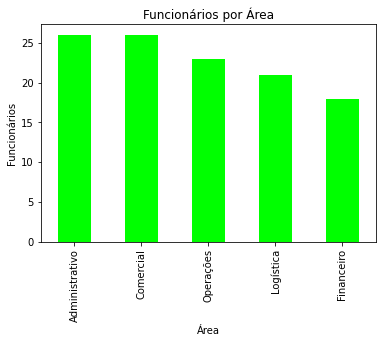

In [110]:

funcionarios_por_area = funcionarios_df['Area'].value_counts()

funcionarios_por_area.plot(kind='bar', 
                           xlabel= 'Área', 
                           ylabel = 'Funcionários', 
                           title = 'Funcionários por Área',
                           color = '#00FF00'
                          ); 


### 6 - Ticket Médio Mensal

In [111]:

ticket = clientes_df['Valor Contrato Mensal'].mean()
print('\033[1;34mTicket Médio Mensal = \033[1;32mR$ {:,.2f}\033[m'.format(ticket))            


Ticket Médio Mensal = R$ 2,502.56
